## References
 - __[Script: Kaggle](https://www.kaggle.com/code/victorferino/amazon-sales-clean-eda-sentiment-analysis#Observation-1:-Product-Category)__
 - __[Dataset: Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)__

# Data Cleaning & Preparation

In [3]:
# Importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import scipy as sp

In [4]:
# Read datasets
df = pd.read_csv('../Python/Input/AmazonSalesDataset/amazon.csv')

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
# product_id: Removing Whitespace
df['product_id'].str.strip()

# discounted_price, actual_price: Replace "₹", ","; Change to correct datatype
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

# discount_percentage: Replace "%"; Change to correct datatype
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

# Show datasets
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
# rating - Replace '|' to '4.0'
df['rating'].value_counts()
df.query('rating == "|"')
df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

# rating_count - replace NaN with '1'
df.loc[df.rating_count.isna(), ['rating_count']] = 1
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [8]:
# category
# Creating a new DataFrame with Selected Column
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

# Splitting the Strings in the category column
catsplit = df['category'].str.split('|', expand=True)

# Renaming category column
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

# Adding newly-splitted categories and removing old category columns
df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

# category_1
# Checking category_1 unique values
df1['category_1'].value_counts()

# Fixing Strings in the Category_1 Column
df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')

# category_2
# Checking category_2 unique values
df1['category_2'].value_counts()

# Fixing Strings in Category_2 column
df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')

# Display dataset
display(df1)
# display(catsplit)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home & Kitchen,Kitchen & Home Appliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home & Kitchen,Kitchen & Home Appliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home & Kitchen,"Heating, Cooling & Air Quality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home & Kitchen,"Heating, Cooling & Air Quality"


In [9]:
# rating_score
# Creating Categories for Rankings
rating_score = []

for score in df1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

# Creating A new Column and Changing the Data Type
df1['rating_score'] = rating_score
df1['rating_score'] = df1['rating_score'].astype('category')

# Reordered Categories
df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

display(df1)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average
...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home & Kitchen,Kitchen & Home Appliances,Above Average
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home & Kitchen,Kitchen & Home Appliances,Above Average
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home & Kitchen,"Heating, Cooling & Air Quality",Average
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home & Kitchen,"Heating, Cooling & Air Quality",Above Average


In [10]:
# difference_price: Delta (Actual Price, Discounted Price)
pric_diff = df1['actual_price'] - df1['discounted_price']
df1.insert(loc=4, column='difference_price', value=pric_diff)

display(df1)

,product_id,product_name,discounted_price,actual_price,difference_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,700.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,150.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,1700.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,370.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,245.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average
...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,540.0,0.59,4.0,1090.0,Home & Kitchen,Kitchen & Home Appliances,Above Average
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,765.0,0.25,4.1,4118.0,Home & Kitchen,Kitchen & Home Appliances,Above Average
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,861.0,0.28,3.6,468.0,Home & Kitchen,"Heating, Cooling & Air Quality",Average
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,491.0,0.26,4.0,8031.0,Home & Kitchen,"Heating, Cooling & Air Quality",Above Average


In [11]:
# user_id, user_name: Produce 1 df to analyze users ID & name
user_id   = pd.DataFrame(data=df['user_id'].str.split(',', expand=False).explode('user_id'))      # 11503 rows
user_name = pd.DataFrame(data=df['user_name'].str.split(',', expand=False).explode('user_name'))  # 11515 rows
df2       = pd.merge(user_id, user_name, left_index=True, right_index=True)                       # 11503 rows


# display(user_id)
# display(user_name)
display(df2)

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh
...,...,...
11498,AHXCDNSXAESERITAFELQABFVNLCA,BATTU SURESHKUMAR
11499,AGRZD6CHLCUNOLMMIMIHUCG7PIFA,Shubham Dubey
11500,AFQZVGSOSOJHKFQQMCEI4725QEKQ,E.GURUBARAN
11501,AEALVGXXIP46OZVXKRUXSDWZJMEA,Mayank S.


# Data Exploration

## Observation 1: Product Category

In [14]:
# Setting Visualization Style
sns.set_style(style='darkgrid')
sns.set_palette(palette="icefire")

In [15]:
# Main Category and Sub-Category
main_sub     = (df1[['category_1', 'category_2', 'product_id']]
                .rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'}))
main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

display(main_sub_piv)

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

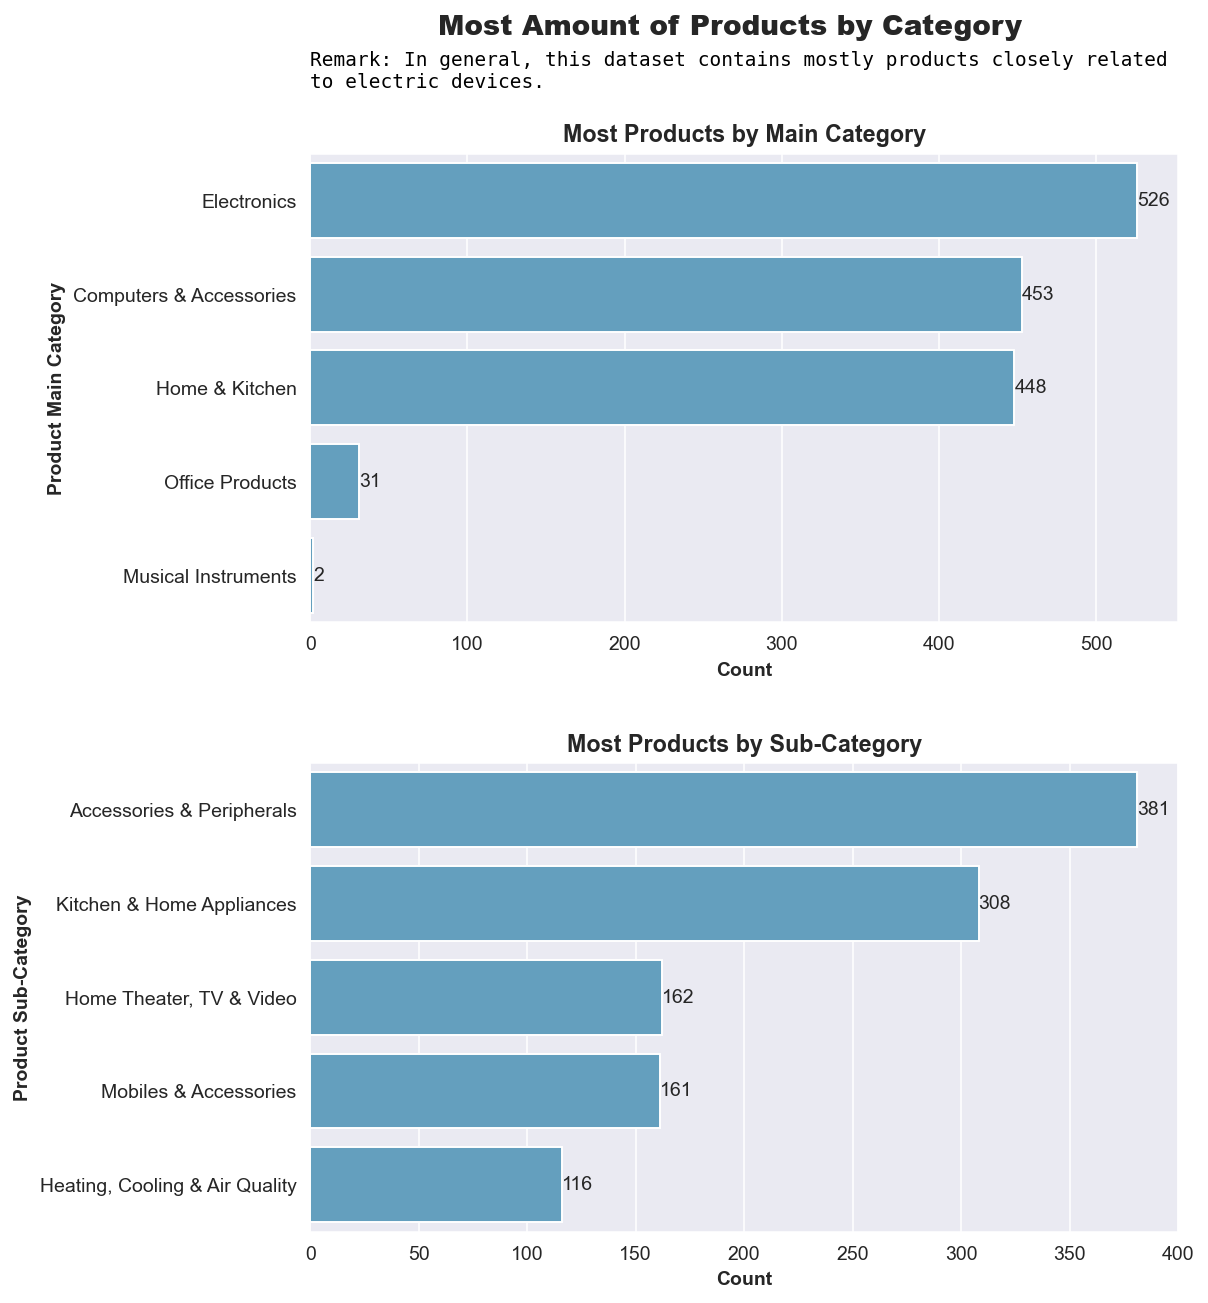

In [16]:
# data
cat_main = df1['category_1'].value_counts().head(5).reset_index(name='counts')
cat_sub  = df1['category_2'].value_counts().head(5).reset_index(name='counts')

# plot
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')
ax[0].text(0,-1.2,f"""Remark: In general, this dataset contains mostly products closely related 
to electric devices.""",color='black',fontsize=10, fontfamily='monospace')

sns.barplot(ax=ax[0], data=cat_main, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=cat_sub,  x='counts', y='category_2')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')

ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')

ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

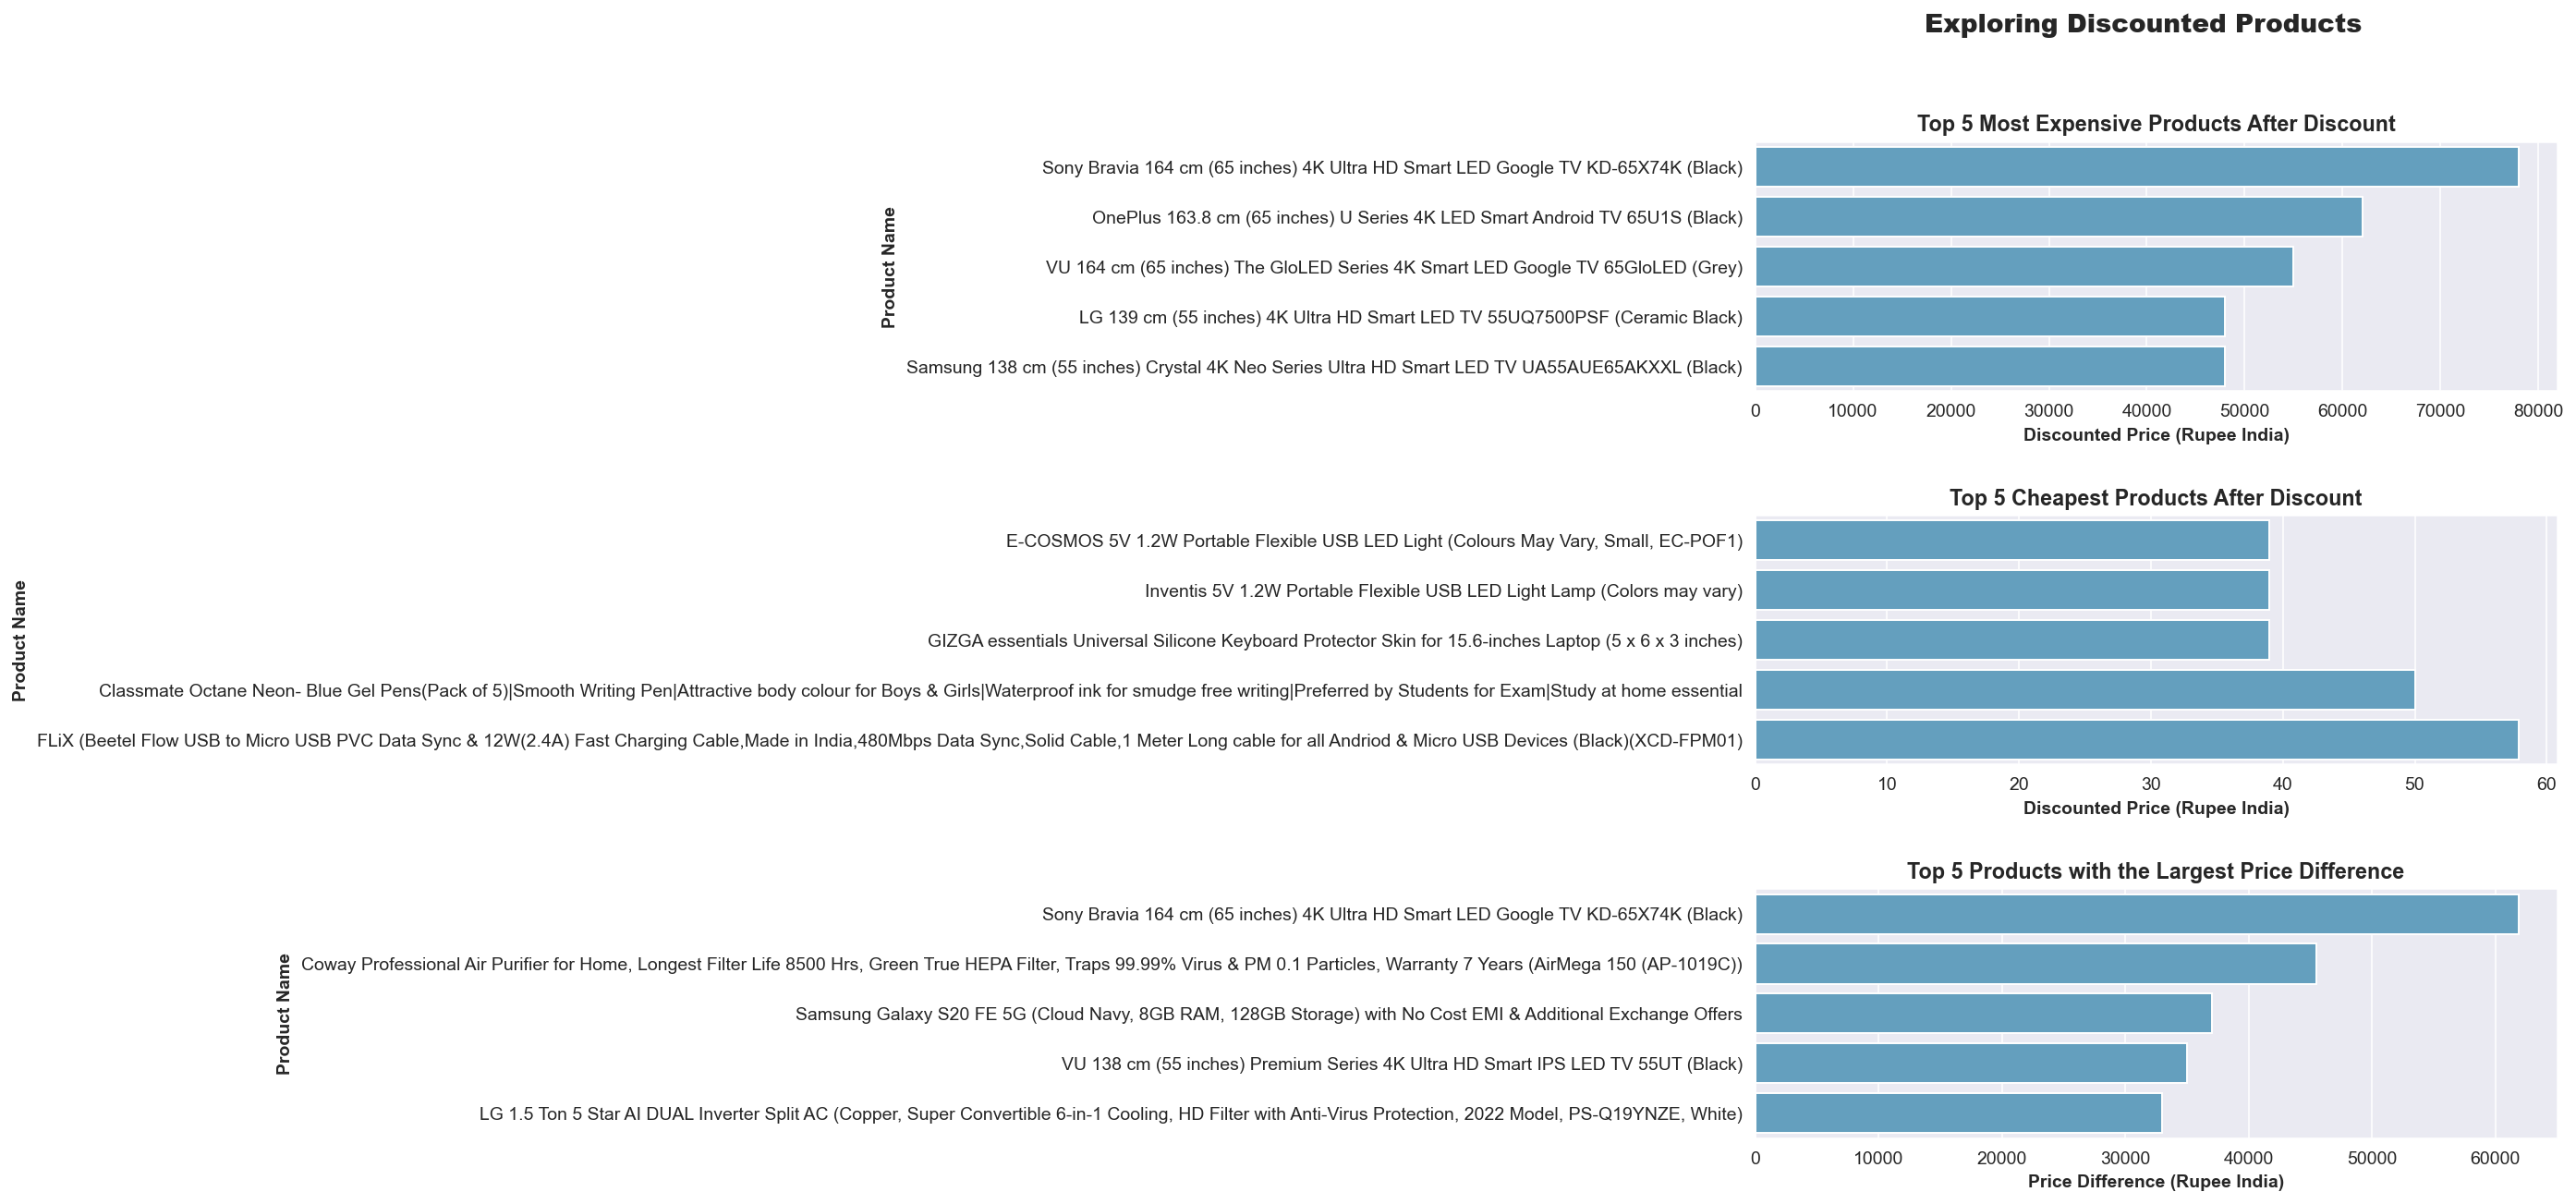

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle('Exploring Discounted Products', fontweight='heavy', size='x-large')
plt.subplots_adjust(hspace = 0.5)

# Top 5 Most Expensive Products After Discount
sns.barplot(ax=ax[0], data=df1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

ax[0].set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
ax[0].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Name', fontweight='bold')

# Top 5 Cheapest Products After Discount
sns.barplot(ax=ax[1], data=df1.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

ax[1].set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Name', fontweight='bold')

# Top 5 Products with the largest difference in price due to discount
sns.barplot(ax=ax[2], data= df1.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

ax[2].set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
ax[2].set_xlabel('Price Difference (Rupee India)', fontweight='bold')
ax[2].set_ylabel('Product Name', fontweight='bold')

plt.show()

## Observation 2: Correlation between Features

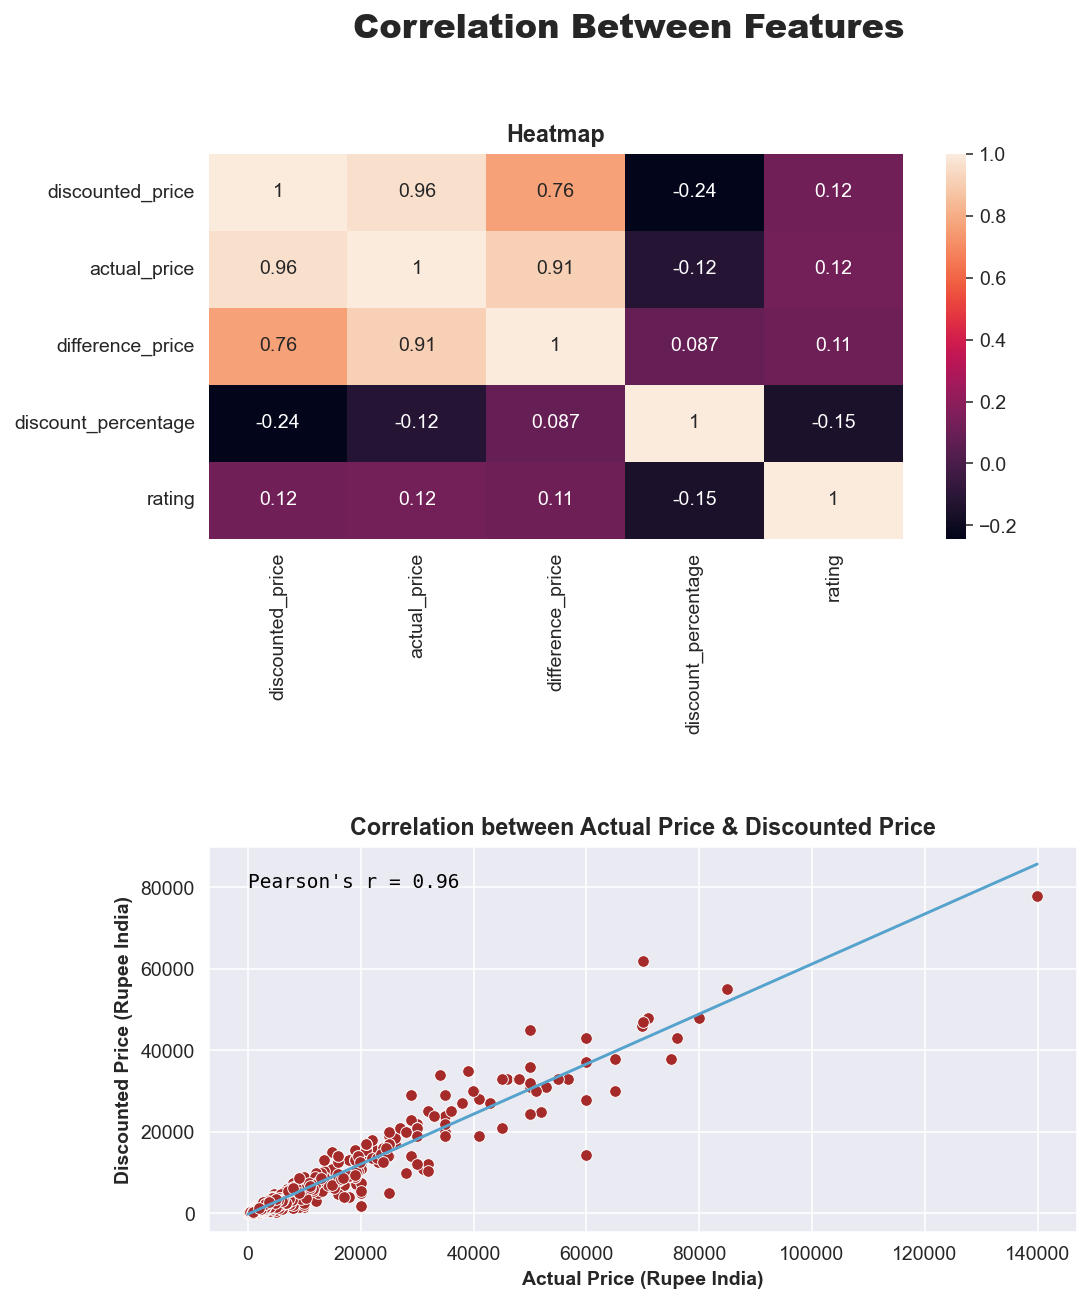

In [19]:
# Data
data = df1[['discounted_price', 'actual_price', 'difference_price','discount_percentage','rating']]

x    = data.actual_price
y    = data.discounted_price

r, p = sp.stats.pearsonr(x=x, y=y)
m, b = np.polyfit(x, y, 1)

# Heatmap & Correlation between Actual Price & Discounted Price
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')

sns.heatmap(ax=ax[0], data=data.corr(), annot=True)
sns.scatterplot(ax=ax[1], data=data, y='discounted_price', x='actual_price', color='brown')
sns.lineplot(ax=ax[1], data=data, y=m*data.actual_price + b, x='actual_price')

plt.subplots_adjust(hspace = 0.8)

ax[1].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

ax[1].text(0,80000,"Pearson's r = {:.2f}".format(r),color='black',fontsize=10, fontfamily='monospace')

plt.show()

## Observation 3: Product Ratings

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1465 non-null   object  
 1   product_name         1465 non-null   object  
 2   discounted_price     1465 non-null   float64 
 3   actual_price         1465 non-null   float64 
 4   difference_price     1465 non-null   float64 
 5   discount_percentage  1465 non-null   float64 
 6   rating               1465 non-null   float64 
 7   rating_count         1463 non-null   float64 
 8   category_1           1465 non-null   object  
 9   category_2           1465 non-null   object  
 10  rating_score         1465 non-null   category
dtypes: category(1), float64(6), object(4)
memory usage: 116.2+ KB


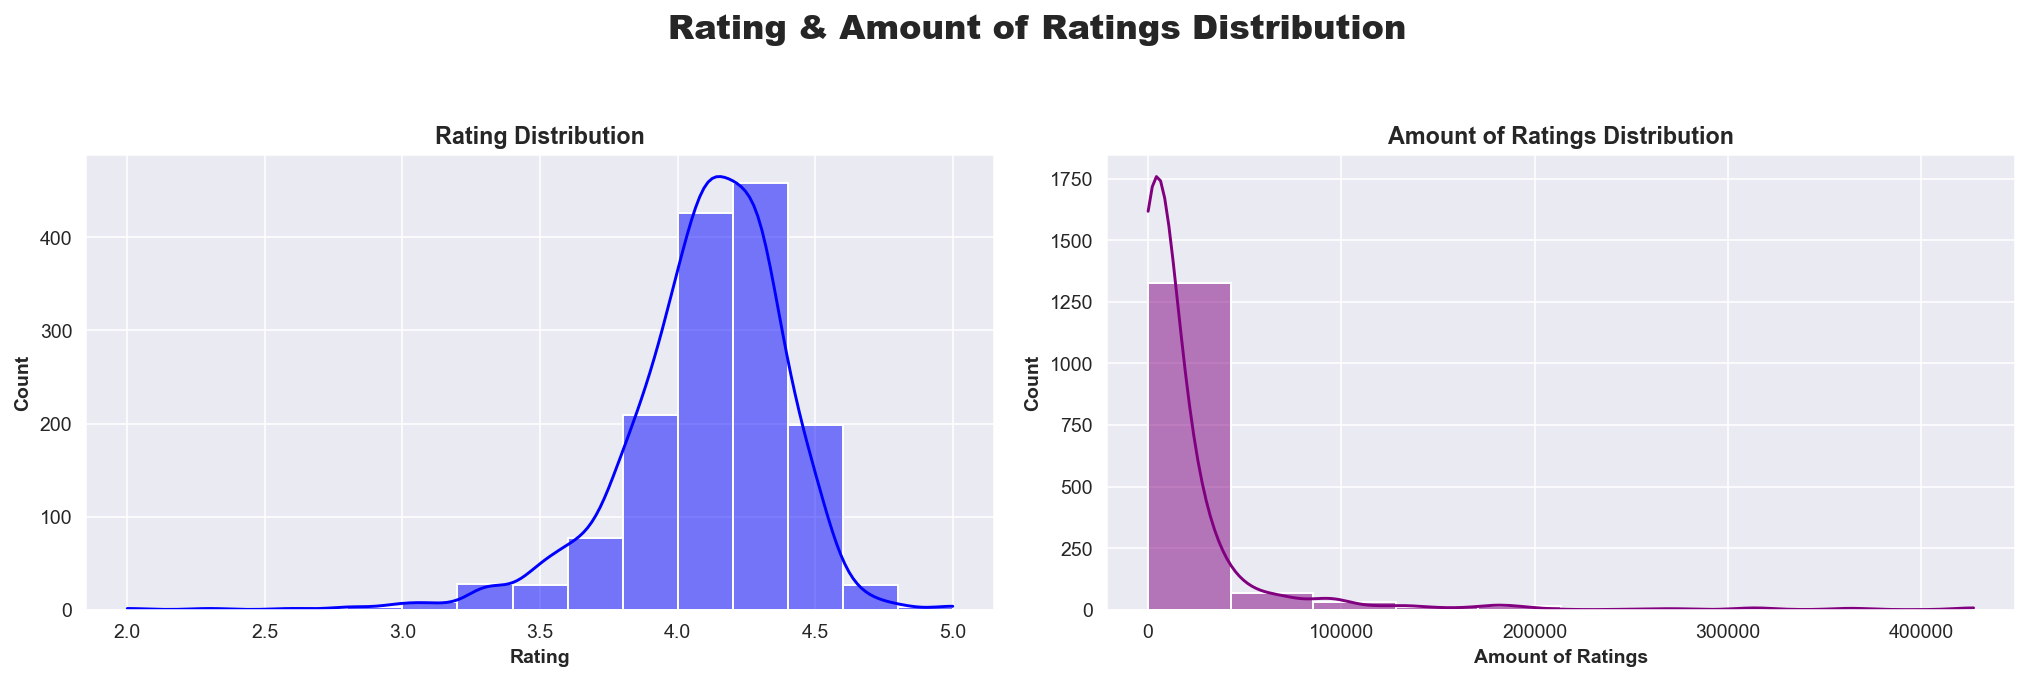

In [22]:
# Rating & Amount of Rating Distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df1, x='rating_count', bins=10, kde=True, color='purple')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

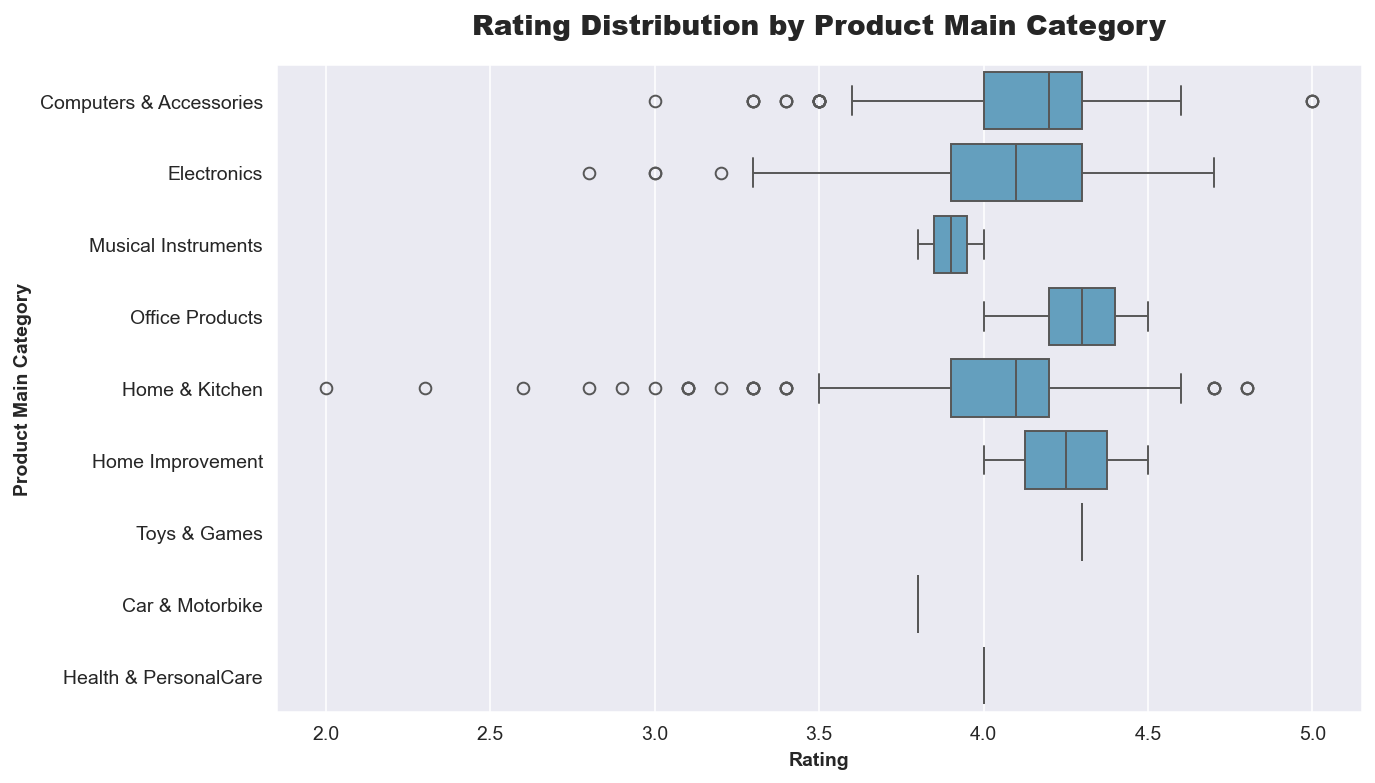

In [23]:
# Rating Distribution by Product Main Category
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

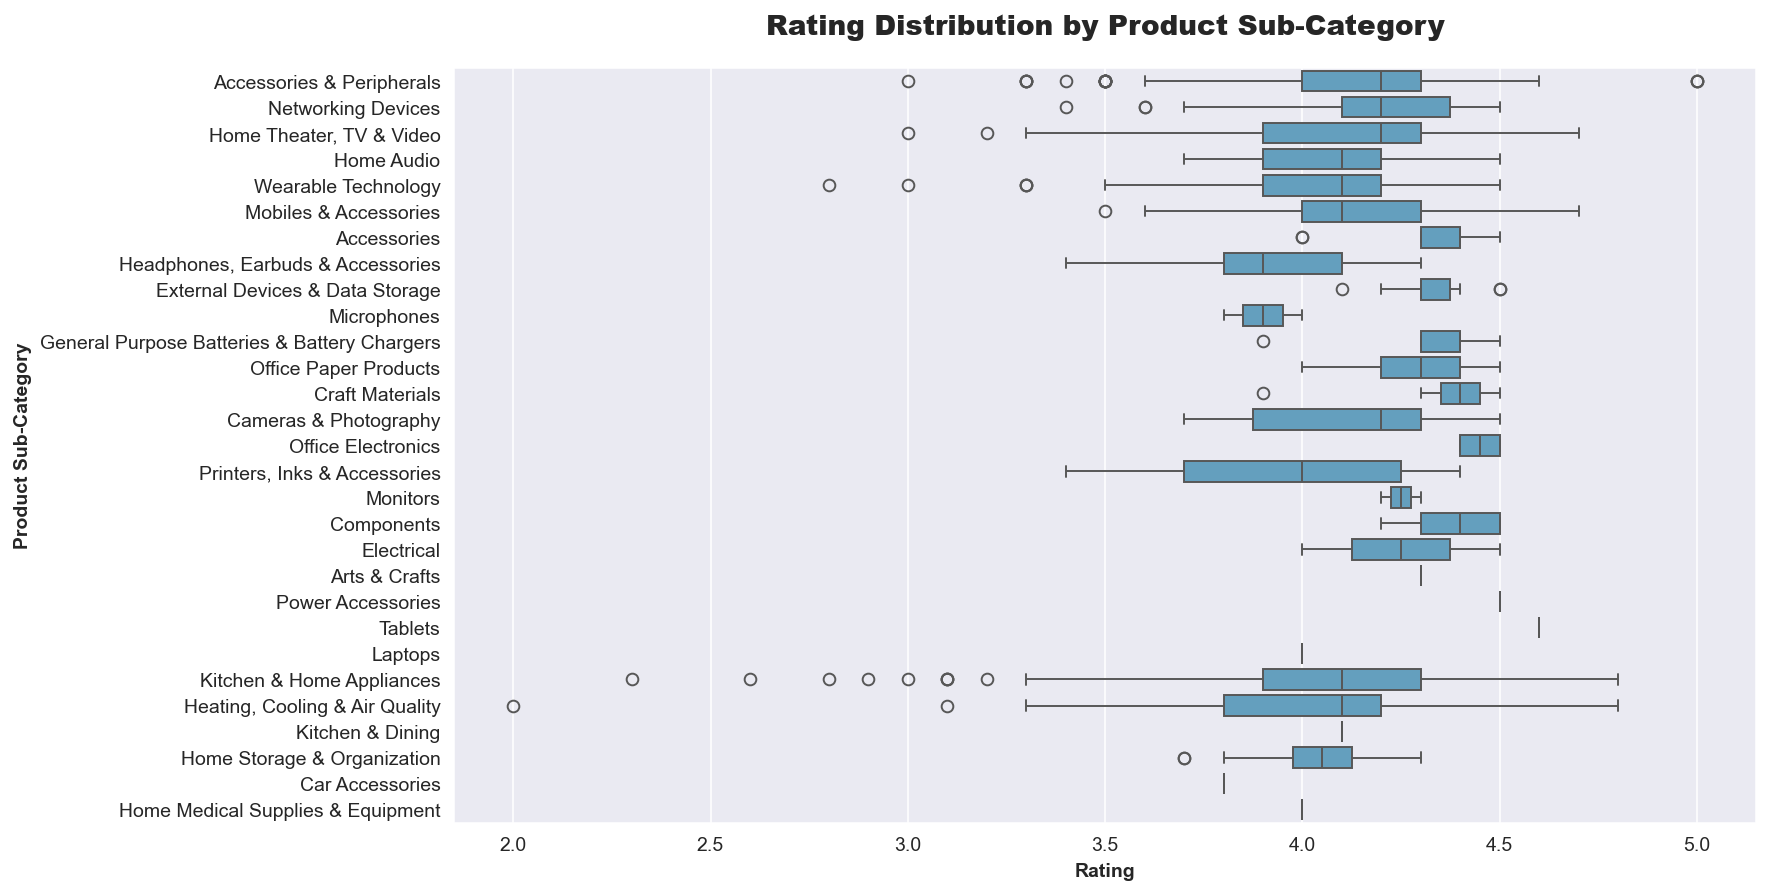

In [24]:
# Rating Distribution by Product Sub-Category
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_2')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

In [25]:
df1['rating_score'].value_counts(normalize=True).reset_index(name='counts')

,rating_score,counts
0,Above Average,0.756314
1,Average,0.237543
2,Below Average,0.004096
3,Excellent,0.002048


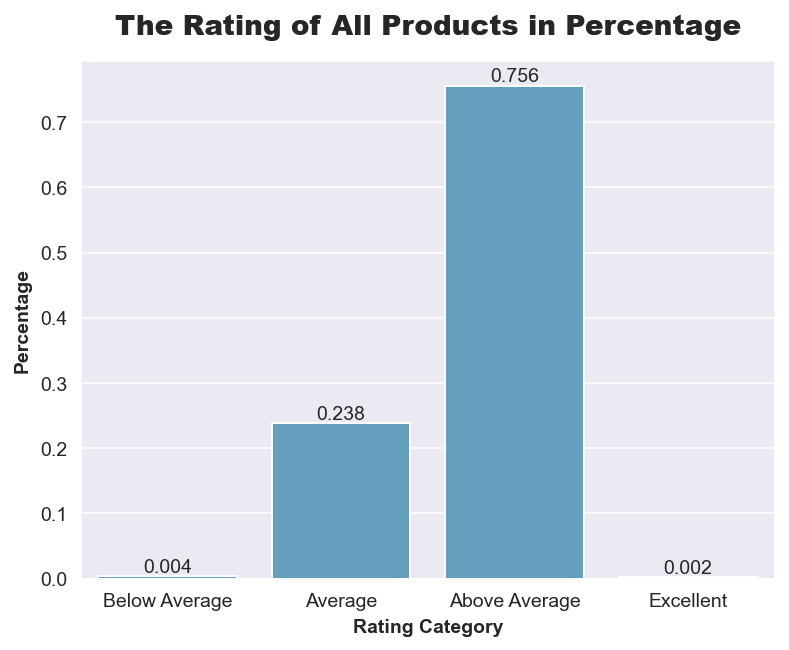

In [26]:
# The Rating of All Products in Percentage
rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']
rating_count = df1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')
rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)

rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

In [27]:
#Pivot table of Rating

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

rating_pivot = df1.pivot_table(values=['rating', 'rating_count'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

rating_pivot = (rating_pivot.rename(columns = {'rating':'Rating', 'rating_count': 'Rating Count', 'median':'Median', 'mean':'Mean'}, 
                                    index={'category_1': 'Main Category', 'category_2': 'Sub Category'}))

rating_pivot 

p25  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                               3.800   
Computers & Accessories Accessories & Peripherals                     4.000   
                        Components                                    4.300   
                        External Devices & Data Storage               4.300   
                        Laptops                                       4.000   
                        Monitors                                      4.225   
                        Networking Devices                            4.100   
                        Printers, Inks & Accessories                  3.700   
                        Tablets                                       4.600   
Electronics             Accessories                                   4.300   
                        Cameras & Photography                         3.875   
                        General Purpose Batteries & Battery Chargers  4.300   
                        Headphones, Earbuds & Accessories             3.800   
                        Home Audio                                    3.900   
                        Home Theater, TV & Video                      3.900   
                        Mobiles & Accessories                         4.000   
                        Power Accessories                             4.500   
                        Wearable Technology                           3.900   
Health & PersonalCare   Home Medical Supplies & Equipment             4.000   
Home & Kitchen          Craft Materials                               4.350   
                        Heating, Cooling & Air Quality                3.800   
                        Home Storage & Organization                   3.975   
                        Kitchen & Dining                              4.100   
                        Kitchen & Home Appliances                     3.900   
Home Improvement        Electrical                                    4.125   
Musical Instruments     Microphones                                   3.850   
Office Products         Office Electronics                            4.400   
                        Office Paper Products                         4.200   
Toys & Games            Arts & Crafts                                 4.300   

                                                                                   \
                                                                     Rating Count   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   1118.00   
Computers & Accessories Accessories & Peripherals                             NaN   
                        Components                                        2515.00   
                        External Devices & Data Storage                  19747.50   
                        Laptops                                            323.00   
                        Monitors                                          2166.25   
                        Networking Devices                               10281.75   
                        Printers, Inks & Accessories                      3435.50   
                        Tablets                                           2886.00   
Electronics             Accessories                                      67259.00   
                        Cameras & Photography                             5384.25   
                        General Purpose Batteries & Battery Chargers      1269.50   
                        Headphones, Earbuds & Accessories                 9881.75   
                        Home Audio                                        2625.75   
                        Home Theater, TV & Video                           426.50   
             

## Observation 3: Reviewers

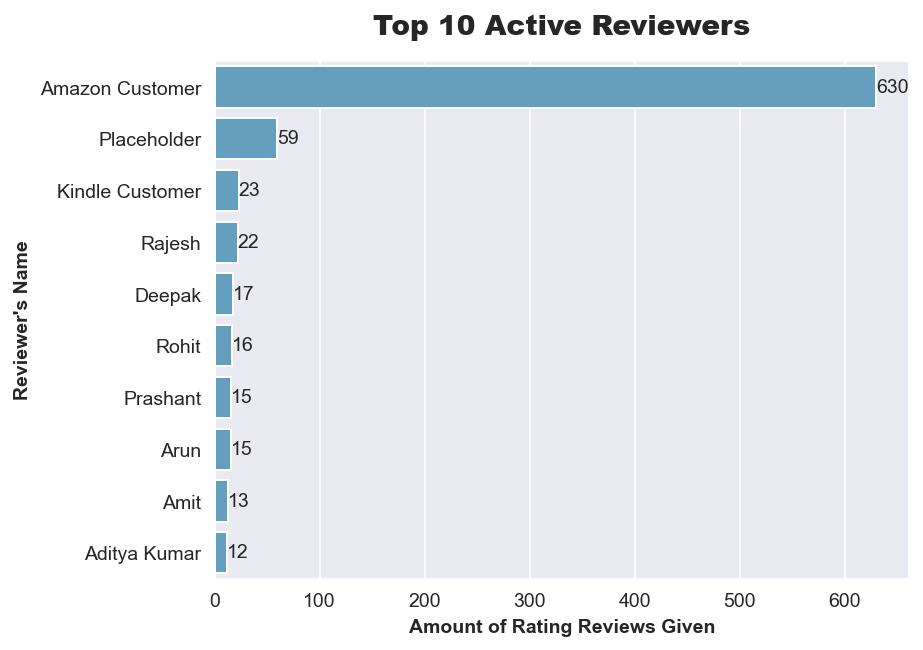

In [29]:
# Reviewers who gave ratings and reviews for more than one product
top_reviewer    = df2['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')
top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')
top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

## Observation 4: Product Pricing

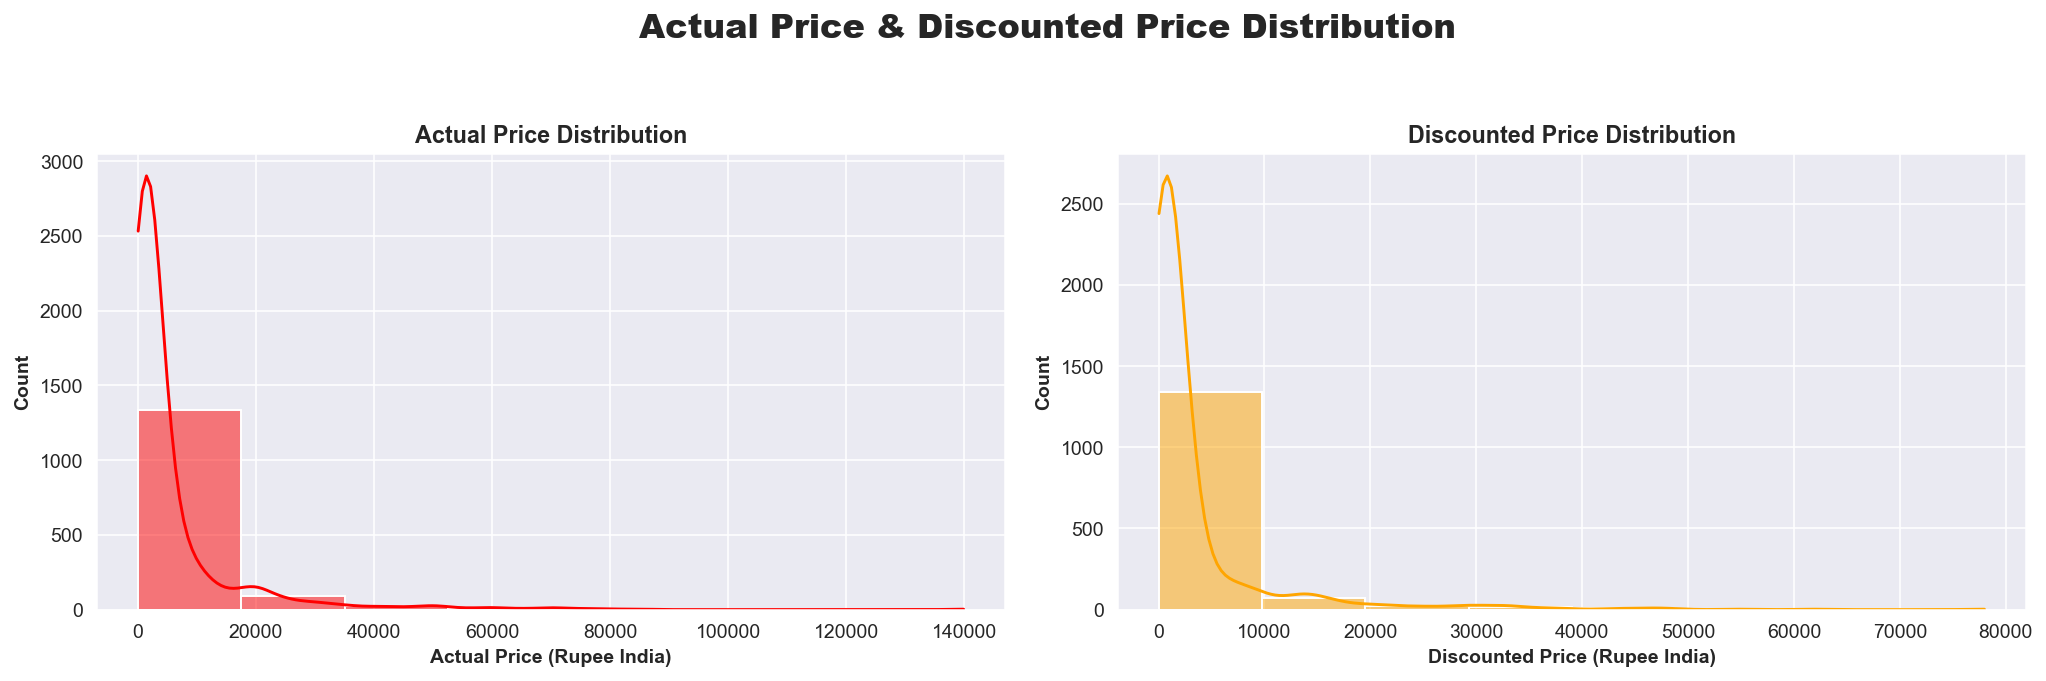

In [31]:
# Actual Price & Discounted Price Distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df1, x='discounted_price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

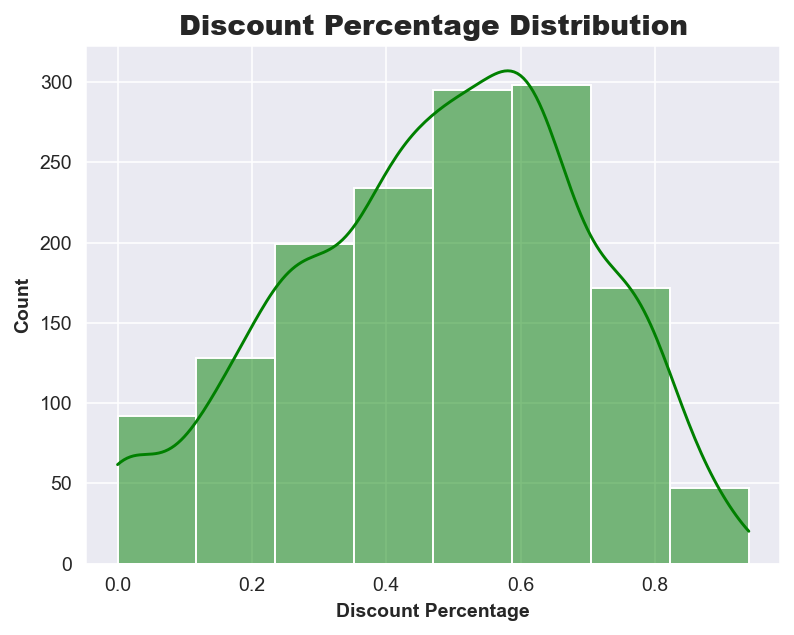

In [32]:
# Discount Percentage Distribution
disc_hist = sns.histplot(data=df1, x='discount_percentage', bins=8, kde=True, color='green')

disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

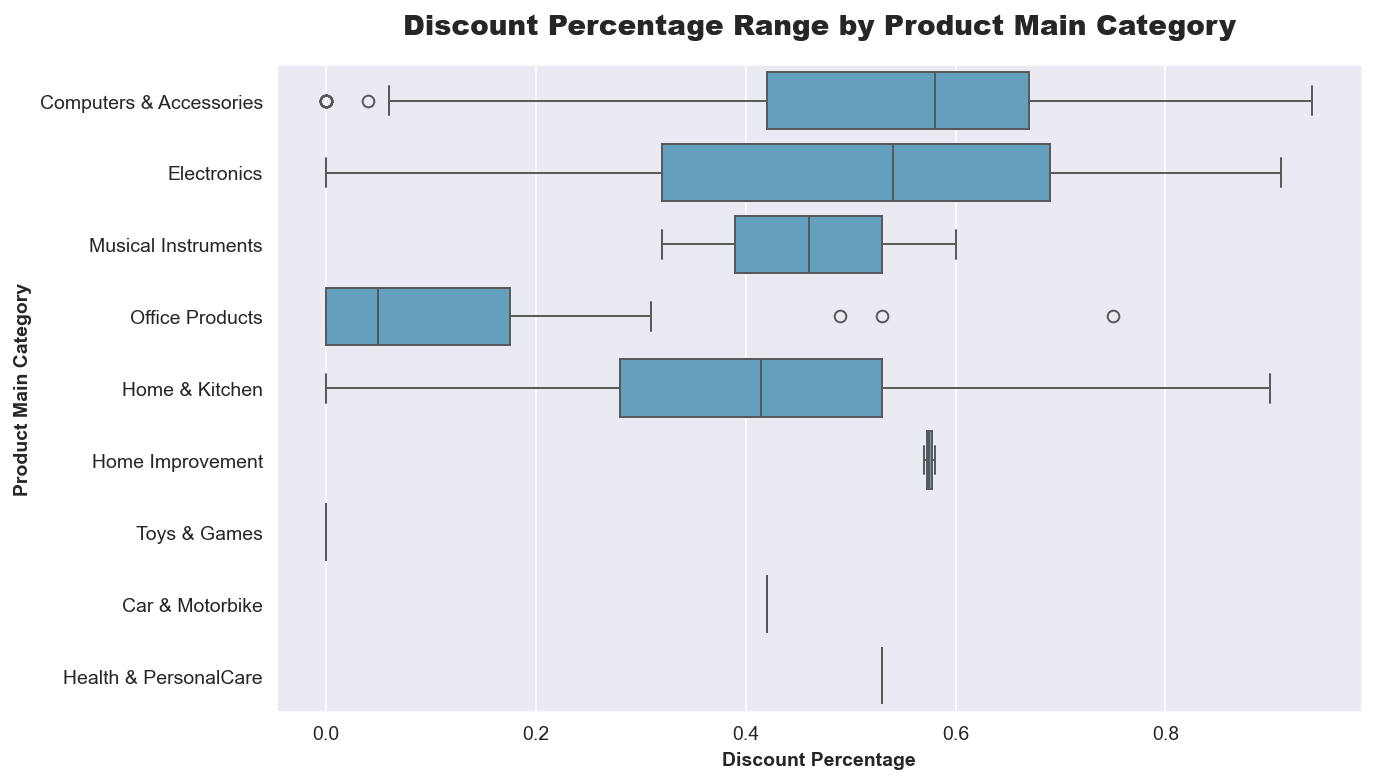

In [33]:
# The Discount Range by Product Main Category
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df1, x='discount_percentage', y='category_1')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

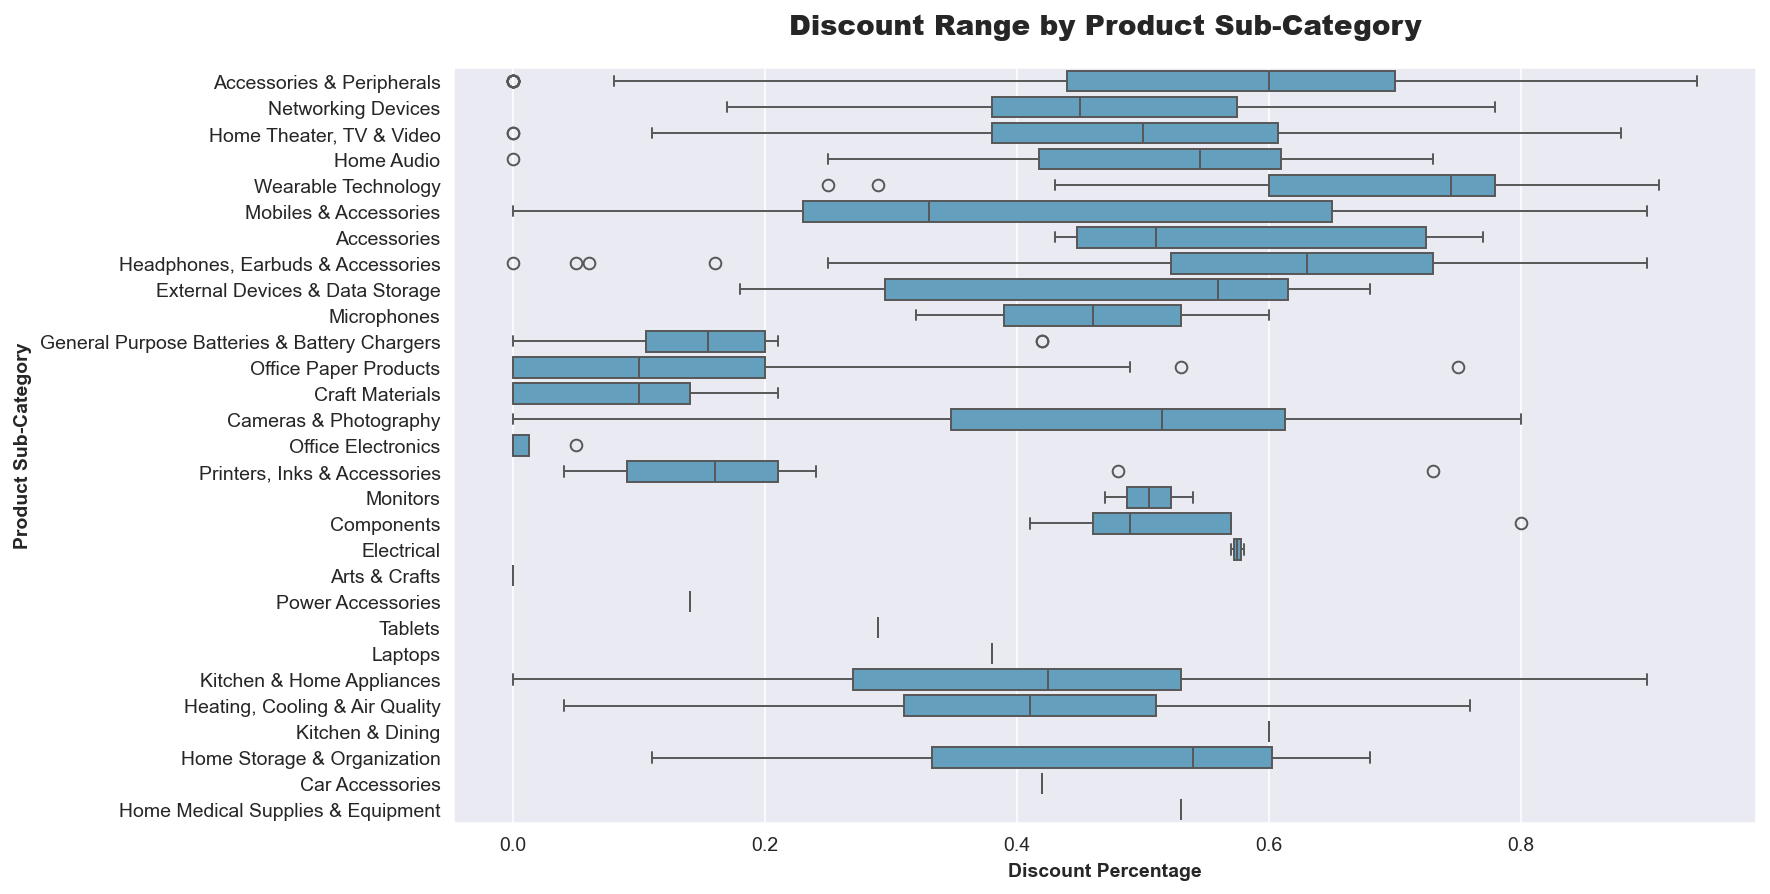

In [34]:
# The Discount Range by Product Sub-Category
fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=df1, x='discount_percentage', y='category_2')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

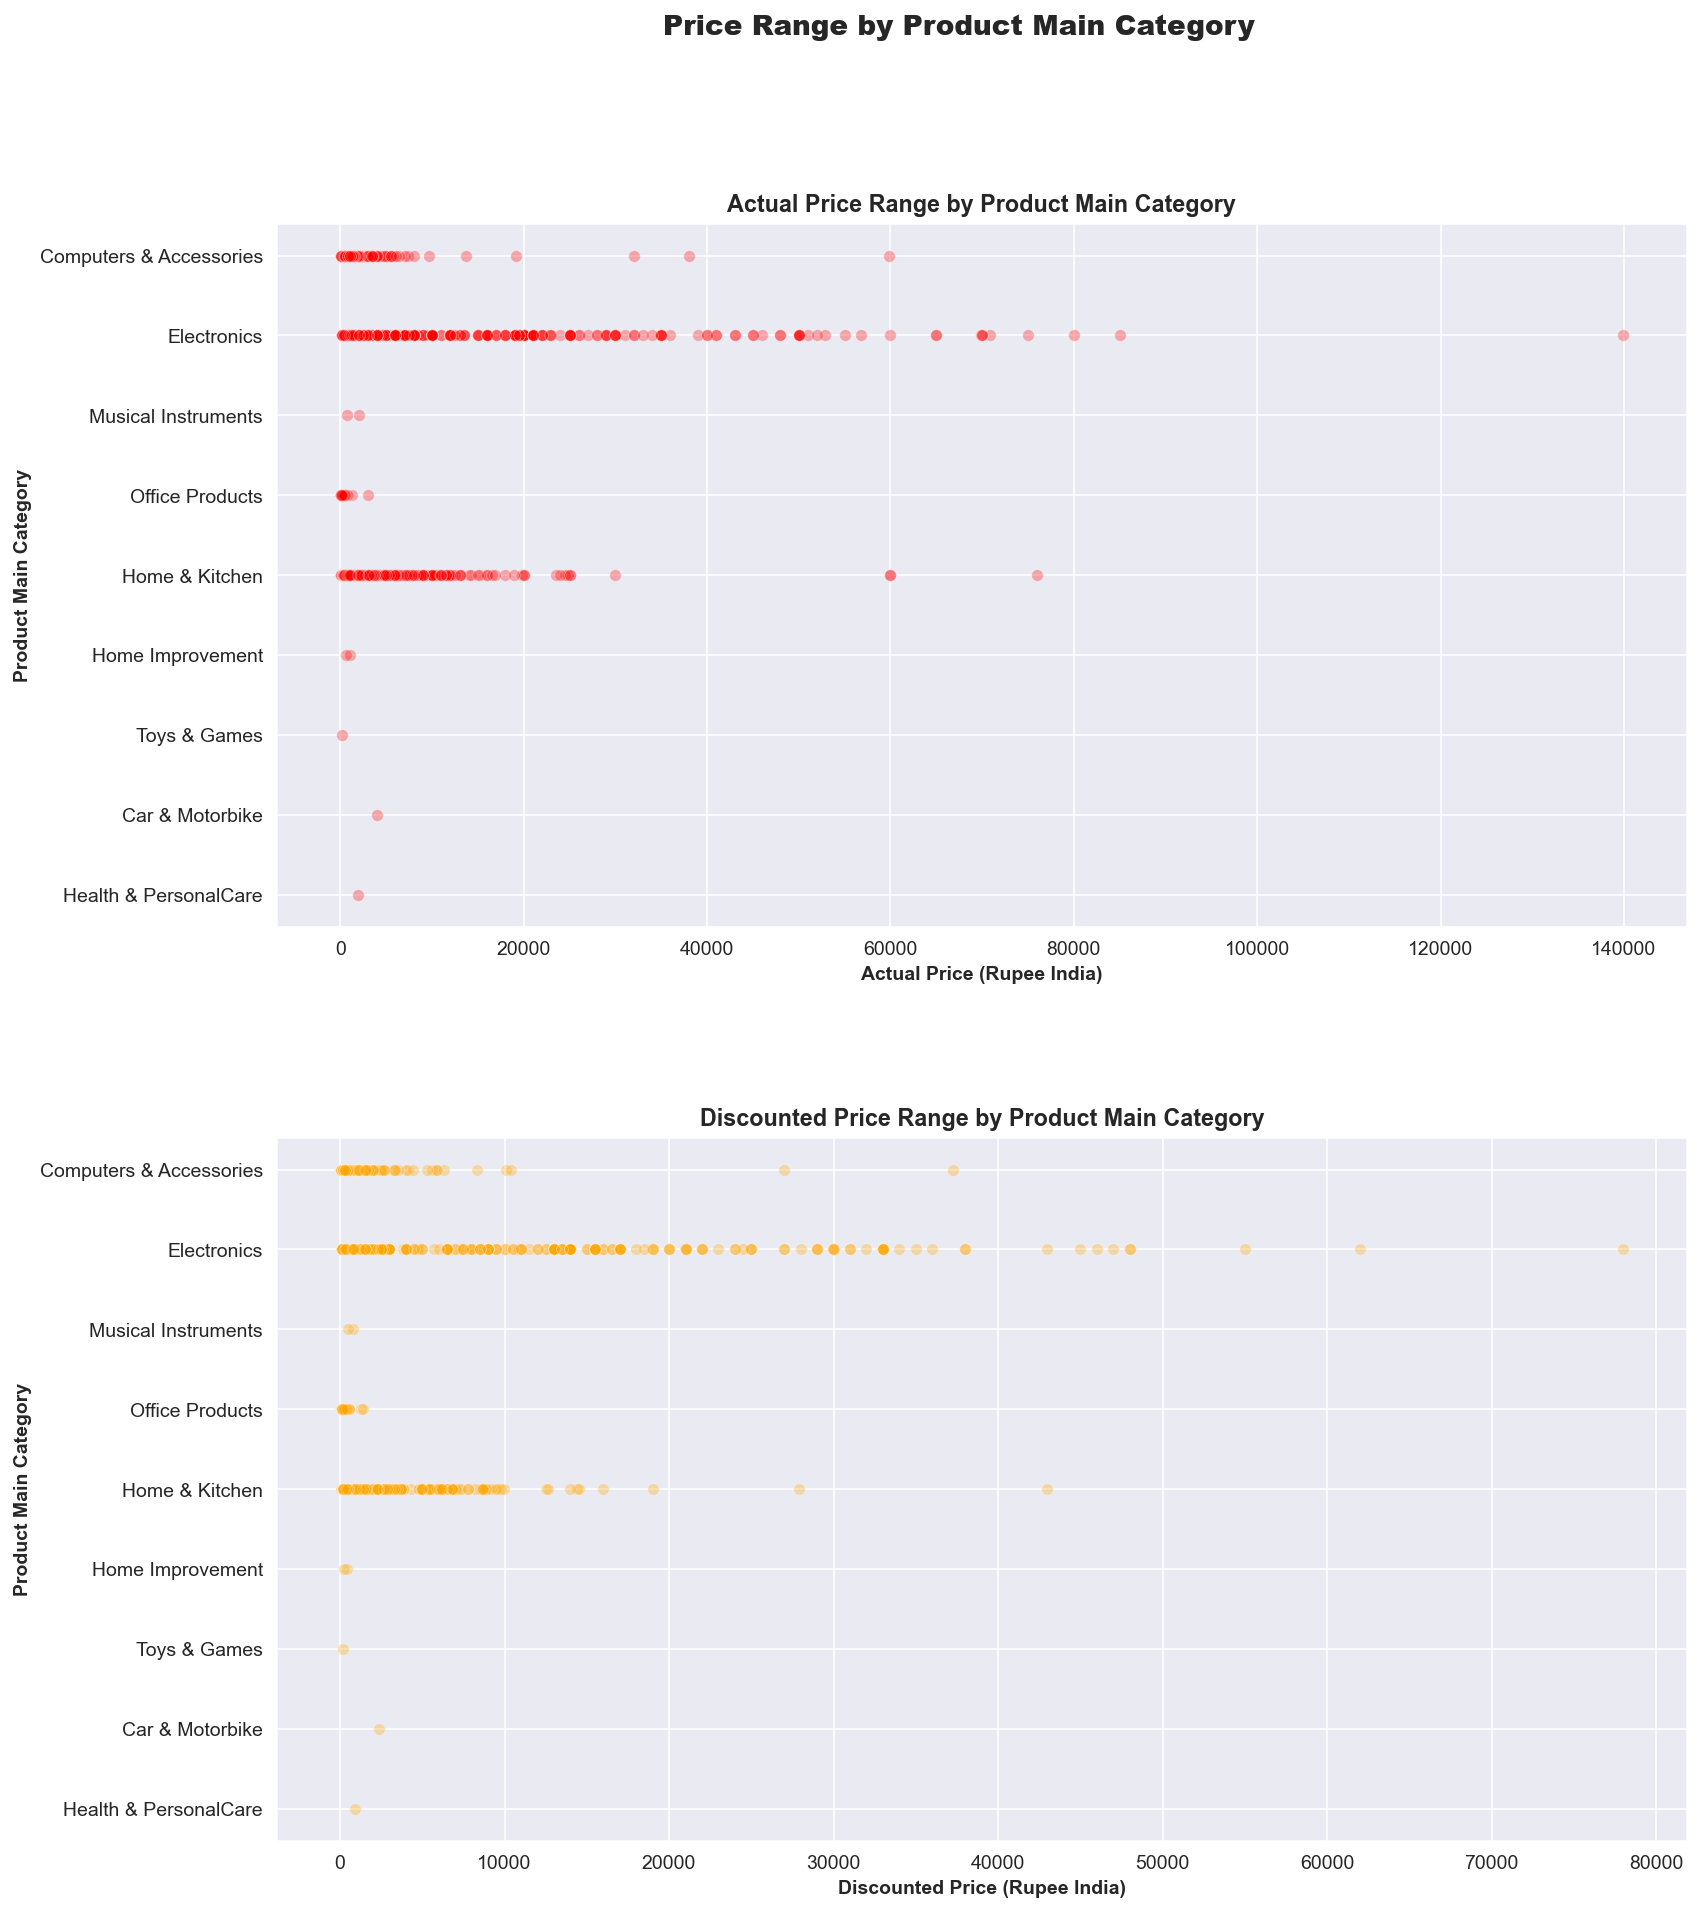

In [35]:
# Actual Price Range and Discounted Price Range by Product Main Category
fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_1', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_1', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

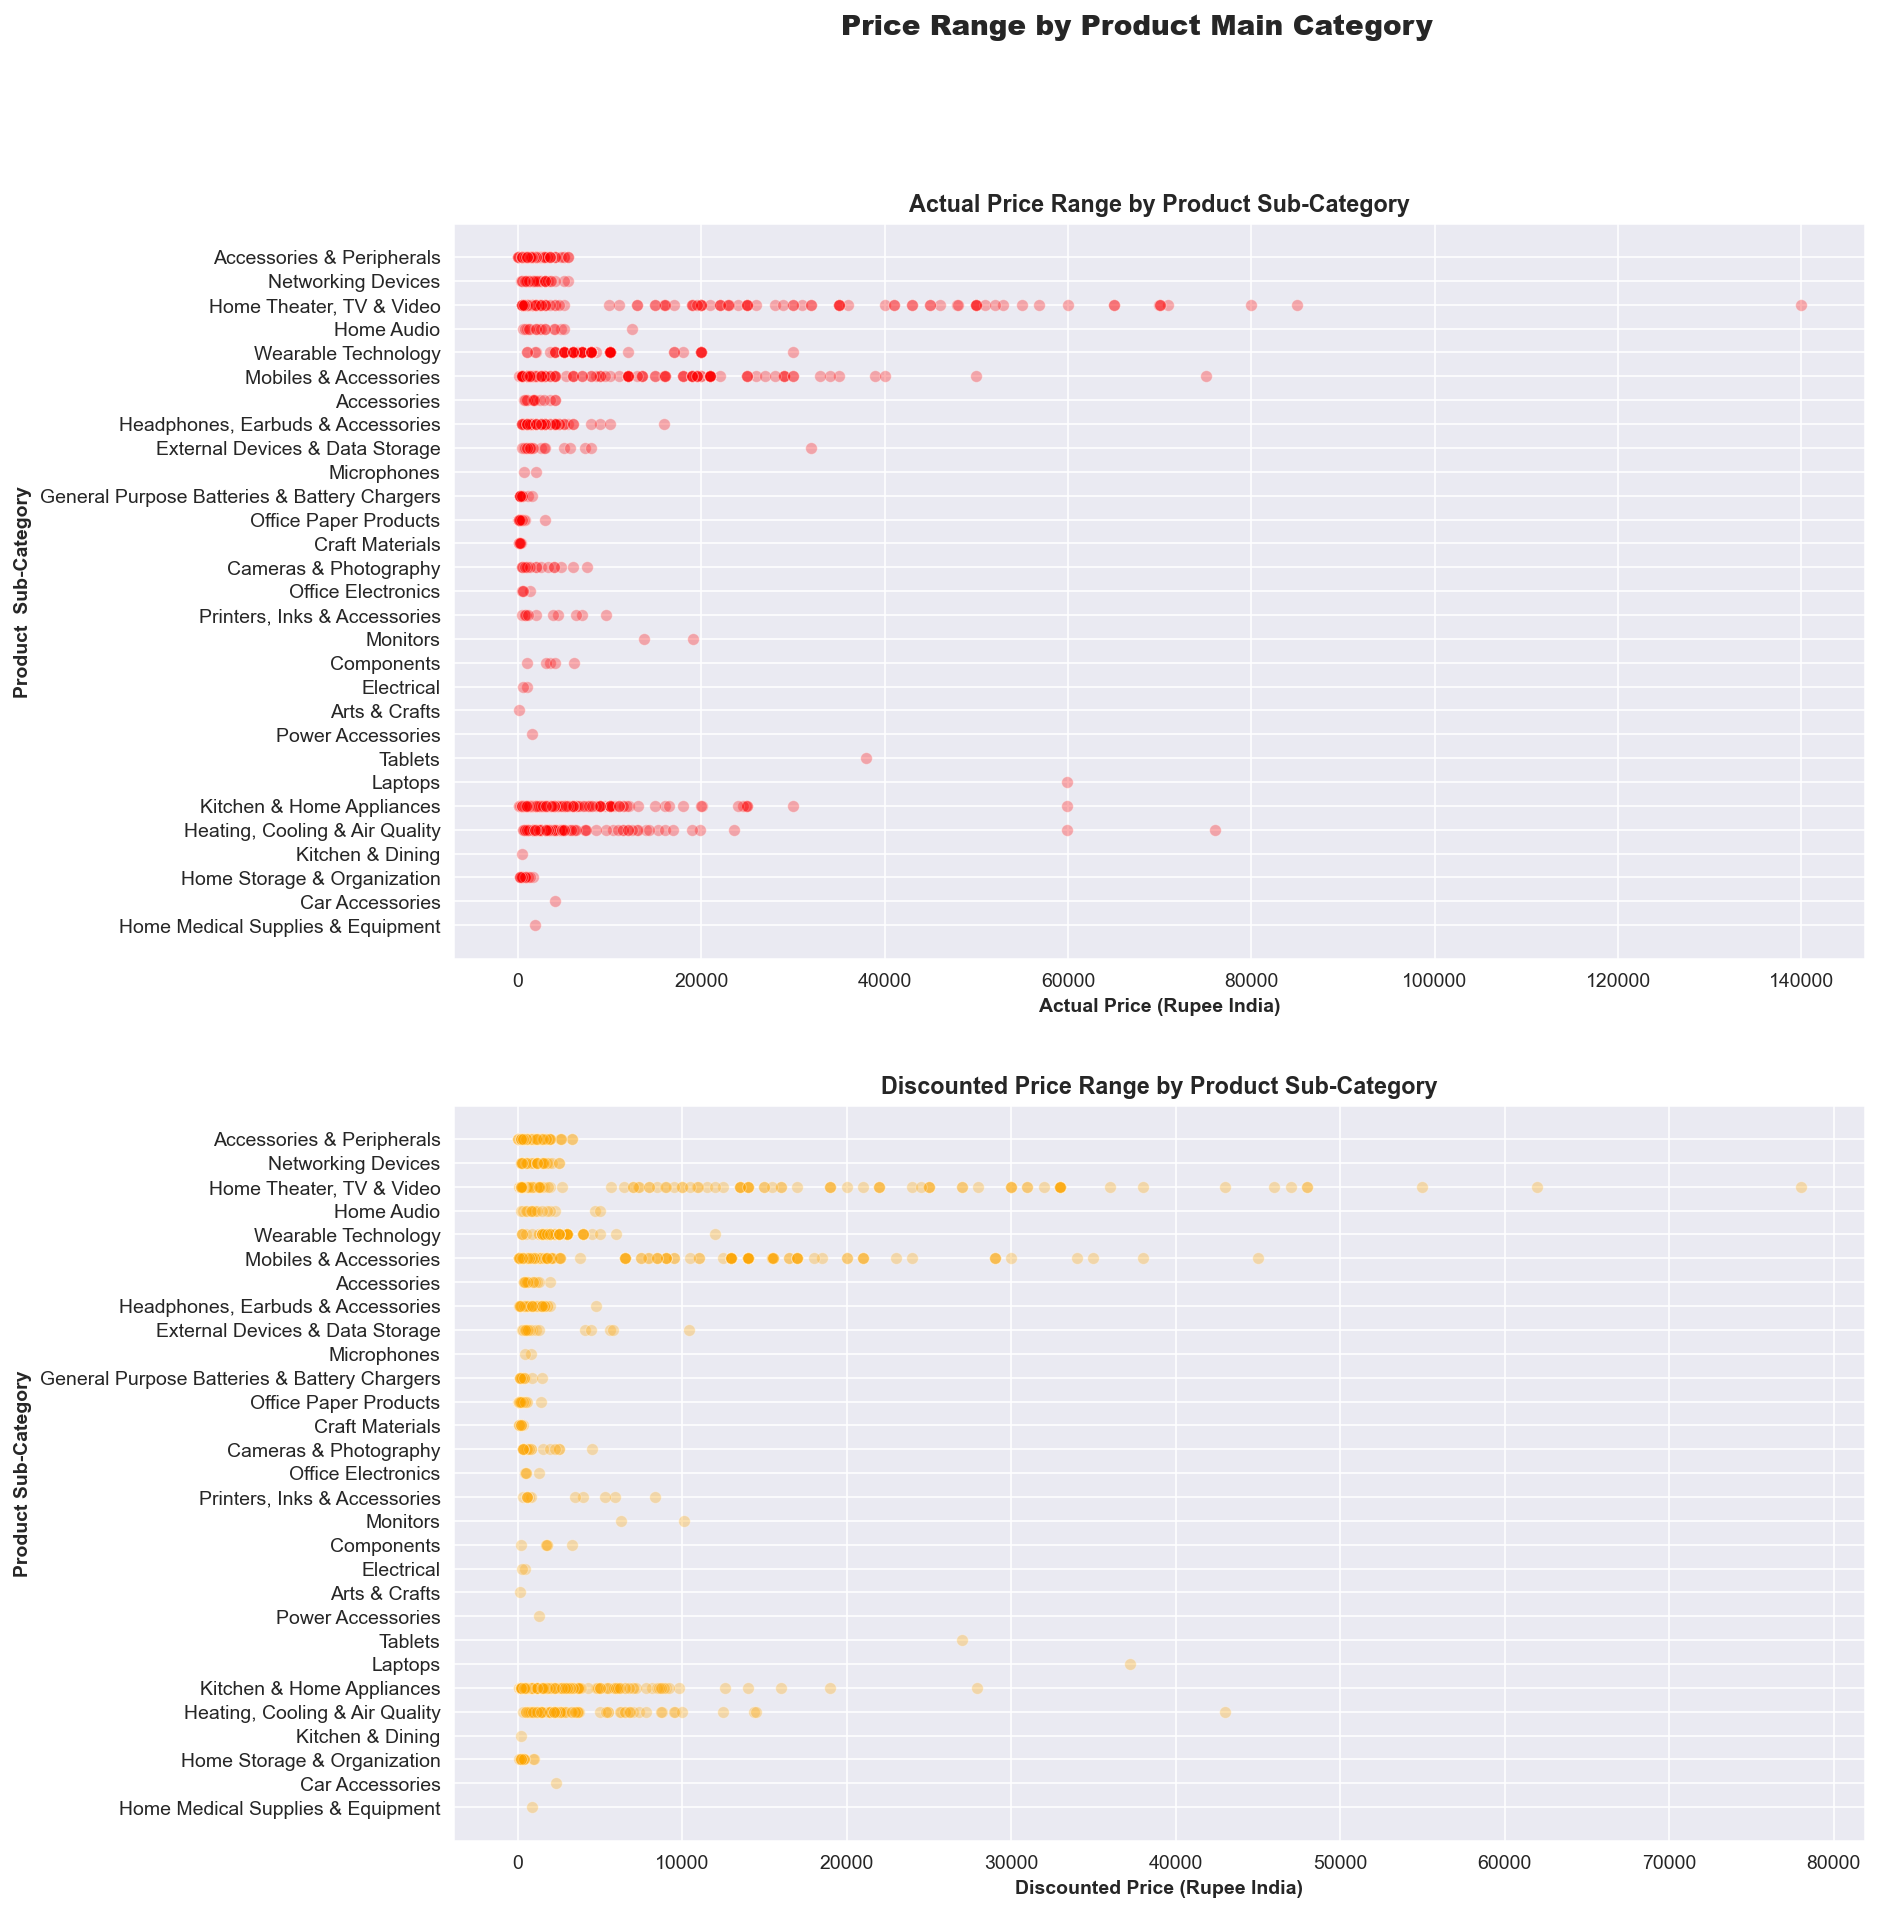

In [36]:
# Actual Price Range and Discounted Price Range by Product Sub Category
fig, ax = plt.subplots(2, 1, figsize=(13, 15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_2', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_2', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product  Sub-Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Sub-Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Sub-Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.2)

plt.show()

In [37]:
# Pivot table of Prices
def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

actual_price_pivot = df1.pivot_table(values=['actual_price', 'discounted_price'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

actual_price_pivot

p25  \
                                                                     actual_price   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   4000.00   
Computers & Accessories Accessories & Peripherals                          499.00   
                        Components                                        3100.00   
                        External Devices & Data Storage                   1074.25   
                        Laptops                                          59890.00   
                        Monitors                                         15090.00   
                        Networking Devices                                1208.00   
                        Printers, Inks & Accessories                       811.00   
                        Tablets                                          37999.00   
Electronics             Accessories                                       1150.00   
                        Cameras & Photography                              946.00   
                        General Purpose Batteries & Battery Chargers       205.00   
                        Headphones, Earbuds & Accessories                  999.00   
                        Home Audio                                        1274.00   
                        Home Theater, TV & Video                           824.00   
                        Mobiles & Accessories                             1299.00   
                        Power Accessories                                 1499.00   
                        Wearable Technology                               5999.00   
Health & PersonalCare   Home Medical Supplies & Equipment                 1900.00   
Home & Kitchen          Craft Materials                                    132.50   
                        Heating, Cooling & Air Quality                    1990.00   
                        Home Storage & Organization                        374.00   
                        Kitchen & Dining                                   495.00   
                        Kitchen & Home Appliances                         1000.00   
Home Improvement        Electrical                                         699.00   
Musical Instruments     Microphones                                       1023.00   
Office Products         Office Electronics                                 511.25   
                        Office Paper Products                              120.00   
Toys & Games            Arts & Crafts                                      150.00   

                                                                                       \
                                                                     discounted_price   
category_1              category_2                                                      
Car & Motorbike         Car Accessories                                       2339.00   
Computers & Accessories Accessories & Peripherals                              199.00   
                        Components                                            1709.00   
                        External Devices & Data Storage                        504.00   
                        Laptops                                              37247.00   
                        Monitors                                              7249.00   
                        Networking Devices                                     530.00   
                        Printers, Inks & Accessories                           597.00   
                        Tablets                                              26999.00   
Electronics             Accessories                                            479.00   
                        Cameras & Photography                                  386.50   
                        General Purpose Batteries & Battery Chargers           166.75   
                      

#  Sentiment Analysis

In [39]:
# Importing packages for Sentiment Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

In [40]:
# Datasets
df3 = df[['product_id','review_title','review_content']]

#Running the polarity Score on the entire dataset
res = {}

for i, row in tqdm(df3.iterrows(), total=len(df3)):
    review_desc =row['review_content']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(review_desc)
    
# display(df3)

  0%|          | 0/1465 [00:00<?, ?it/s]

In [41]:
pol_score = pd.DataFrame(res).T.reset_index().rename(columns={'index' : 'product_id'})

pol_score

,product_id,neg,neu,pos,compound
0,B07JW9H4J1,0.032,0.744,0.224,0.9033
1,B098NS6PVG,0.010,0.821,0.169,0.9853
2,B096MSW6CT,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,0.116,0.719,0.165,0.9809
...,...,...,...,...,...
1346,B08L7J3T31,0.016,0.763,0.221,0.9468
1347,B01M6453MB,0.122,0.714,0.164,0.7876
1348,B009P2LIL4,0.083,0.718,0.199,0.9698
1349,B00J5DYCCA,0.061,0.882,0.057,-0.2960


In [42]:
# Merging the Dataframe with Polarity Score
df4 = df1.merge(pol_score, how='left')

df4

,product_id,product_name,discounted_price,actual_price,difference_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,neg,neu,pos,compound
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,700.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,0.032,0.744,0.224,0.9033
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,150.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,0.010,0.821,0.169,0.9853
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,1700.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,370.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,245.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,0.116,0.719,0.165,0.9809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,540.0,0.59,4.0,1090.0,Home & Kitchen,Kitchen & Home Appliances,Above Average,0.016,0.763,0.221,0.9468
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,765.0,0.25,4.1,4118.0,Home & Kitchen,Kitchen & Home Appliances,Above Average,0.122,0.714,0.164,0.7876
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,861.0,0.28,3.6,468.0,Home & Kitchen,"Heating, Cooling & Air Quality",Average,0.083,0.718,0.199,0.9698
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,491.0,0.26,4.0,8031.0,Home & Kitchen,"Heating, Cooling & Air Quality",Above Average,0.061,0.882,0.057,-0.2960


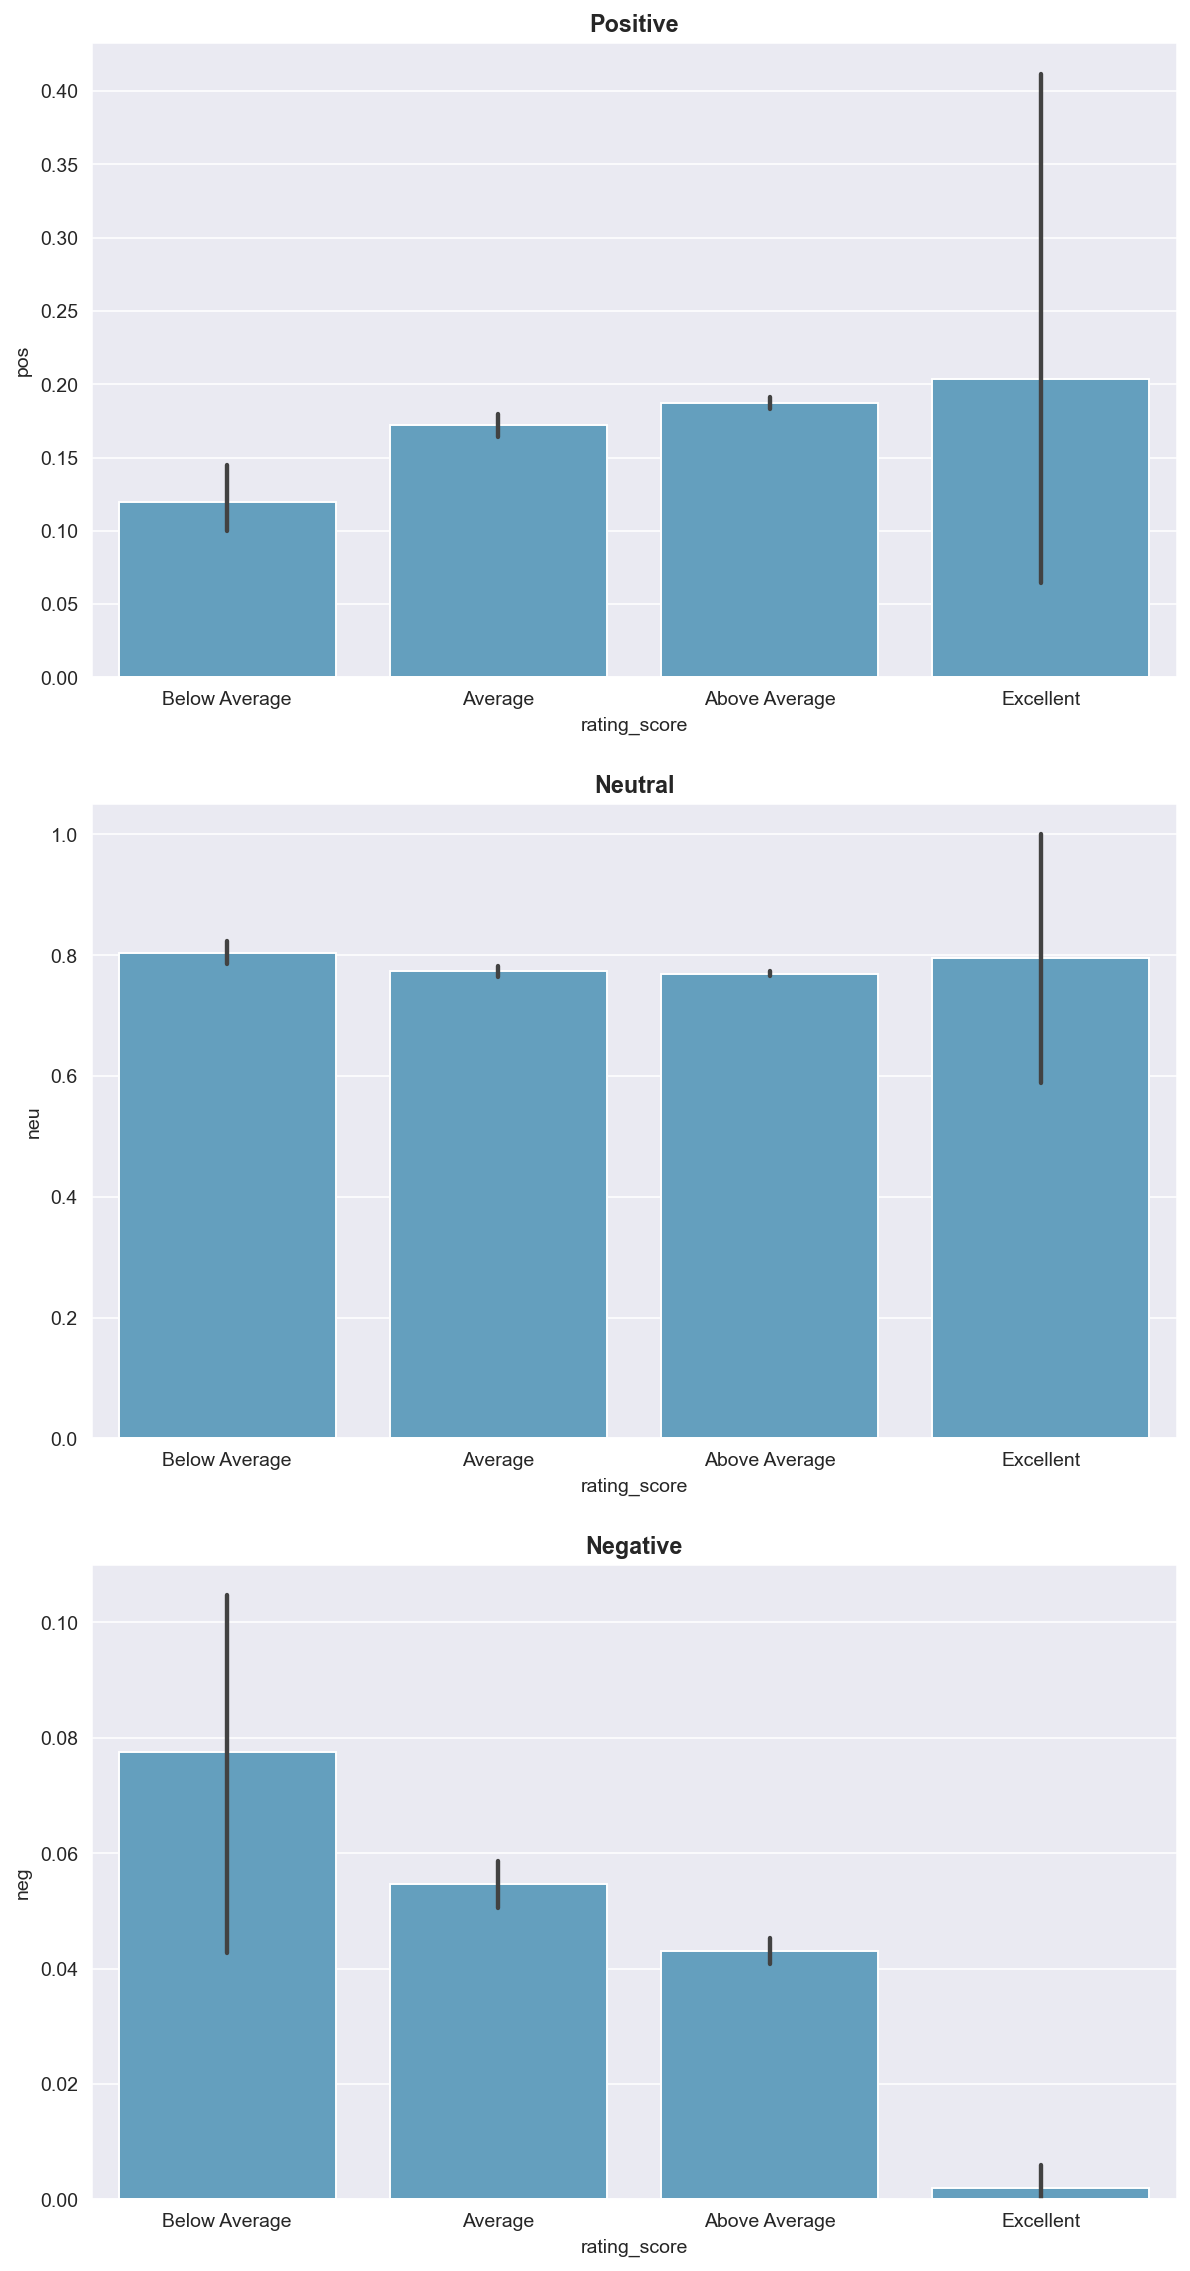

In [43]:
# Comparing Results of the Sentiment Analysis with the Rating 
fig, ax = plt.subplots(3,1, figsize=(10,20))

sns.barplot(data=df4, x='rating_score', y='pos', ax=ax[0])
sns.barplot(data=df4, x='rating_score', y='neu', ax=ax[1])
sns.barplot(data=df4, x='rating_score', y='neg', ax=ax[2])

ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')

plt.show()

In [44]:
df4[['pos', 'neu', 'neg', 'compound']].describe()

,pos,neu,neg,compound
count,1465.000000,1465.000000,1465.000000,1465.000000
mean,0.183363,0.770760,0.045884,0.819592
std,0.074289,0.071911,0.037698,0.368496
min,0.000000,0.465000,0.000000,-0.982100
25%,0.132000,0.727000,0.020000,0.870300
50%,0.173000,0.780000,0.041000,0.961400
75%,0.225000,0.820000,0.064000,0.988600
max,0.500000,1.000000,0.413000,0.999900


Conclusion:
- At higher rating, more positive words, less negative words.
- At lower rating, more negative words, less positive words.
- Most reviews are positive reviews with an **average compound score of 96%**

## Note
https://medium.com/@mystery0116/nlp-how-does-nltk-vader-calculate-sentiment-6c32d0f5046b
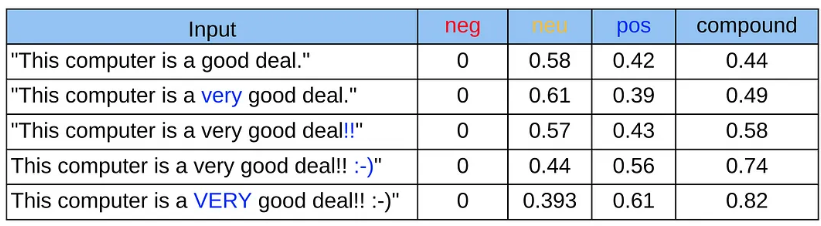